# Entrega 3
### Ignacio Ziccardi
### Simulación de un ADC (cuantización)

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 23 09:26:57 2025

@author: Ignacio
"""
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#%%  Valores de parámetros
Fo = 1.0
Fs = 1000.0 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras
ts = 1/Fs # tiempo de muestreo
df = Fs/N # resolución espectral
Ac =1.0 #2**0.5 #Amplitud 
DC = 0 #Valor Contínua
tita = 0 #Defasaje
SNR = 97 # SNR en dB
sigma = (10**(-SNR/10)) #Varianza
desvio = sigma**0.5 #Desvío Estándar
B = 4 #Número de Bits
fc = 0.8 #Factor de Carga para no tener saturación del ADC por ruido en el pico de la señal
Vref = 2#Ac/fc #Tensión de referencia del ADC
#q = Vref/(2**(B-1)) 

In [18]:
#%% Funciones
def my_sin_gen( vmax, dc, fo, ph, nn, fs): 
    tt = np.arange(0,nn*1/fs,1/fs) # grilla de sampleo temporal
    xx = vmax*np.sin(2*np.pi*fo*tt + ph) + dc #Senoidal
    return [tt, xx]

def cuantificar(signal, bits, vref):
    q = vref/(2**(bits-1)) 
    #s1 = (fc*Vref/Ac)*signal
    sq = signal*(1/q)
    sq1 = np.round(sq)
    ss_cuantizada = sq1*q#*(1/(fc*Vref/Ac))
    return ss_cuantizada

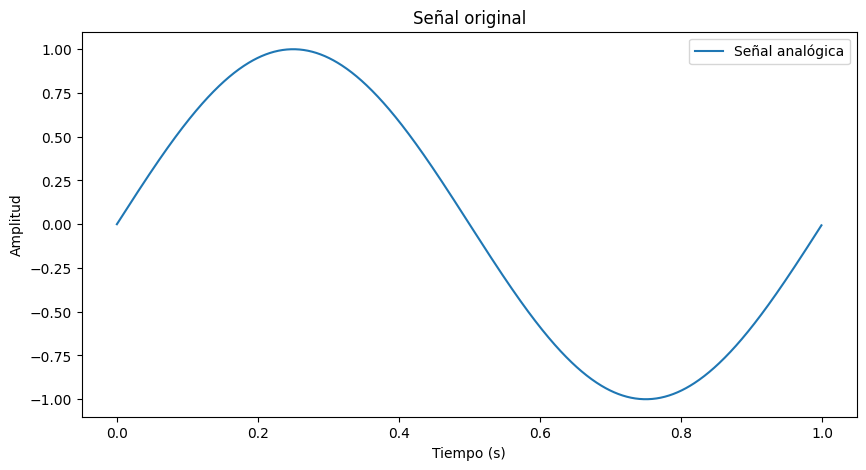

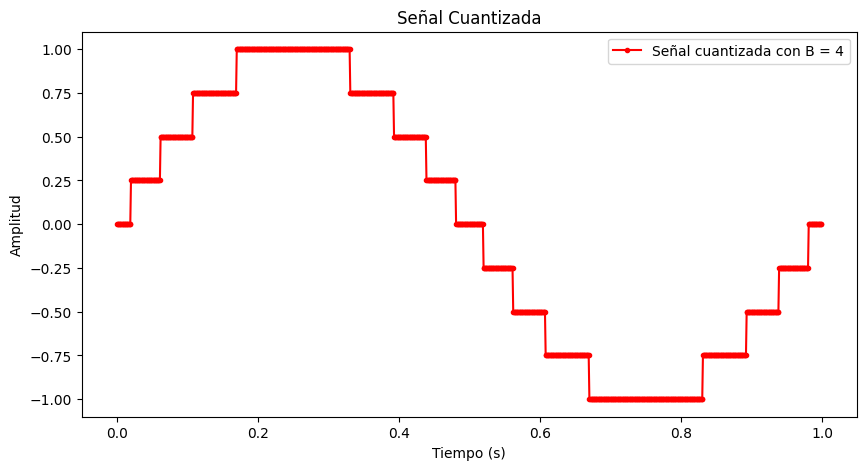

In [28]:
#%%Obtengo señal con ruido y su versión cuantizada 
tt, s = my_sin_gen(vmax = Ac, dc = DC, fo = Fo, ph=tita, nn = N, fs = Fs )
#Genero señal aleatoria para el ruido
na=np.random.normal(0, desvio, len(tt))

ss = s #+ na

ssq = cuantificar(signal = ss,bits = B,vref = Vref)#4Bits
ssq2= cuantificar(signal = ss,bits = 2*B,vref = Vref)#8Bits
ssq3= cuantificar(signal = ss,bits = 4*B,vref = Vref)#16Bits


plt.figure("Señal Original",figsize=(10, 5))
plt.plot(tt, ss, label="Señal analógica")
plt.title("Señal original")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()
plt.figure("Cuantizada Versión 1",figsize=(10, 5))
plt.title("Señal Cuantizada")
plt.plot(tt, ssq, color = 'r', label=f"Señal cuantizada con B = {B}", marker=".")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

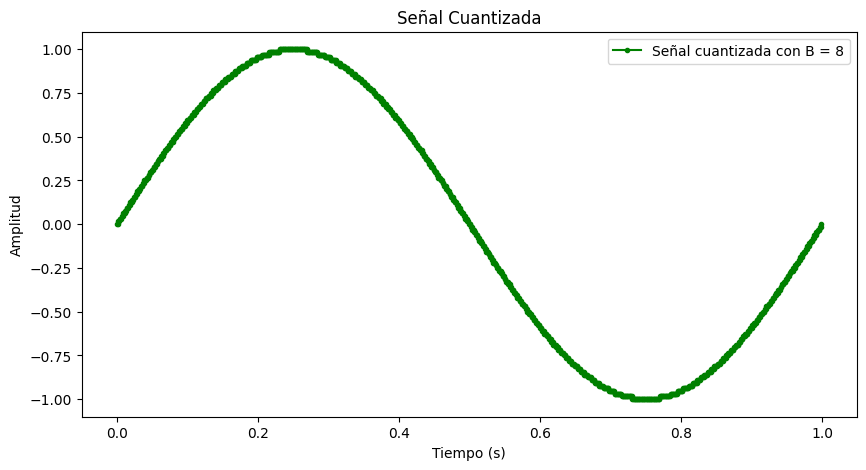

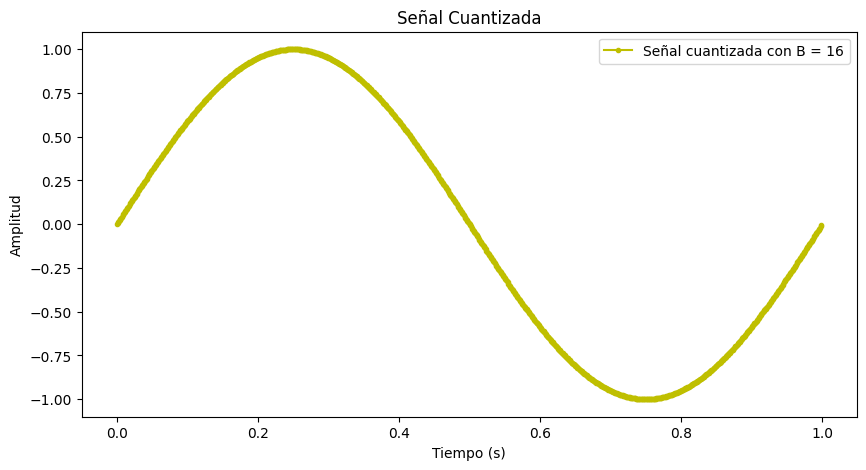

In [29]:

plt.figure("Cuantizada Versión 2",figsize=(10, 5))
plt.title("Señal Cuantizada")
plt.plot(tt, ssq2, color = 'g', label=f"Señal cuantizada con B = {2*B}", marker=".")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()
plt.figure("Cuantizada Versión 3",figsize=(10, 5))
plt.title("Señal Cuantizada")
plt.plot(tt, ssq3, color = 'y', label=f"Señal cuantizada con B = {4*B}", marker=".")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.show()

e1 = ssq - ss
e2 = ssq2 - ss
e3 = ssq3 - ss

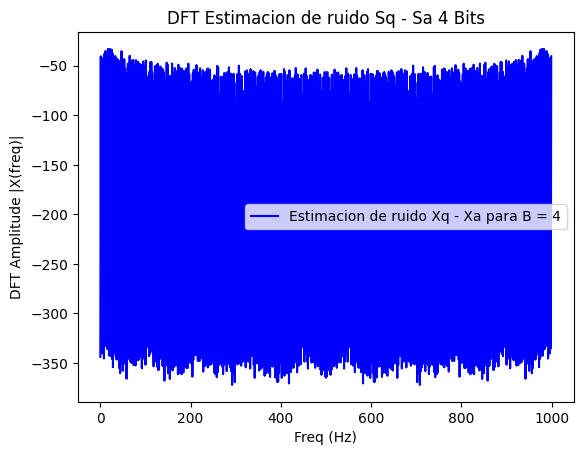

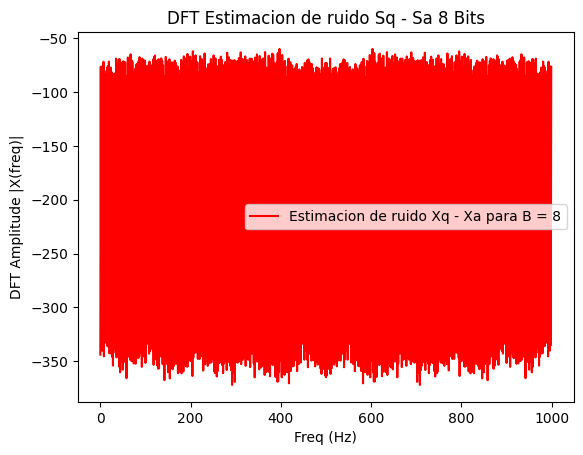

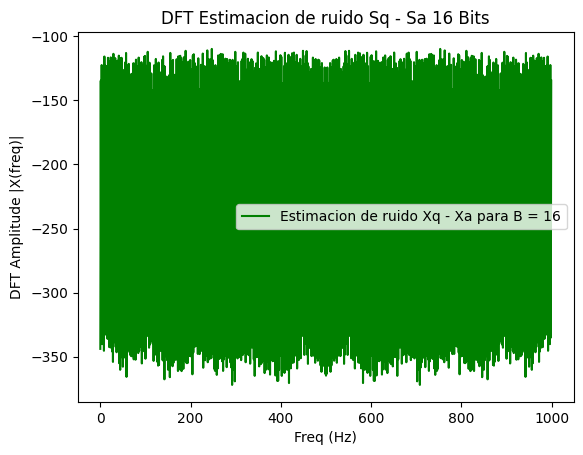

In [34]:
TFFE1=np.fft.fft(e1)/N#Espectro de la estimacion de ruido de cuantizacion
mod1=10*np.log10(2*np.abs(TFFE1)**2)

plt.figure("DFT Estimacion de ruido Sq-Sa Caso 1")
plt.title('DFT Estimacion de ruido Sq - Sa 4 Bits')
plt.plot(tt*len(tt)*df, mod1,color = 'b',label=f"Estimacion de ruido Xq - Xa para B = {B}")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.legend()
plt.show()

TFFE2=np.fft.fft(e2)/N#Espectro de la estimacion de ruido de cuantizacion
mod2=10*np.log10(2*np.abs(TFFE2)**2)

plt.figure("DFT Estimacion de ruido Sq-Sa Caso 2")
plt.title('DFT Estimacion de ruido Sq - Sa 8 Bits')
plt.plot(tt*len(tt)*df, mod2,color = 'r',label=f"Estimacion de ruido Xq - Xa para B = {2*B}")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.legend()
plt.show()
TFFE3=np.fft.fft(e3)/N#Espectro de la estimacion de ruido de cuantizacion
mod3=10*np.log10(2*np.abs(TFFE3)**2)

plt.figure("DFT Estimacion de ruido Sq-Sa Caso 3")
plt.title('DFT Estimacion de ruido Sq - Sa 16 Bits')
plt.plot(tt*len(tt)*df, mod3,color = 'g',label=f"Estimacion de ruido Xq - Xa para B = {4*B}")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.legend()
plt.show()

## Conclusiones

Se observa que se puede corroborar lo visto en clase, si una señal pura sin ningún tipo de ruido se cuantiza, por el simple hecho de cuantizarla se genera una diferencia entre la señal original y la cuantizada conocida como ruido de cuantización. Se observa en los gráficos que este error depende directamente de la cantidad de bits, cuanto mayor sea la cantidad de bits del ADC menor será el ruido de cuantización, en el ejemplo se observa que el error desciende aproximadamente 50dB duplicando la cantidad de bits.
El próximo paso para anallizar es comparar el ruido de cuantización con el ruido que pudiera tener la señal analógica.